<a href="https://colab.research.google.com/github/yasir9030/Machine_learning/blob/main/12_logistic_regrssion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Confusion Matrix:
 [[66  2]
 [ 8 24]]
Accuracy: 0.9


/tmp/ipython-input-2273405955.py:56: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


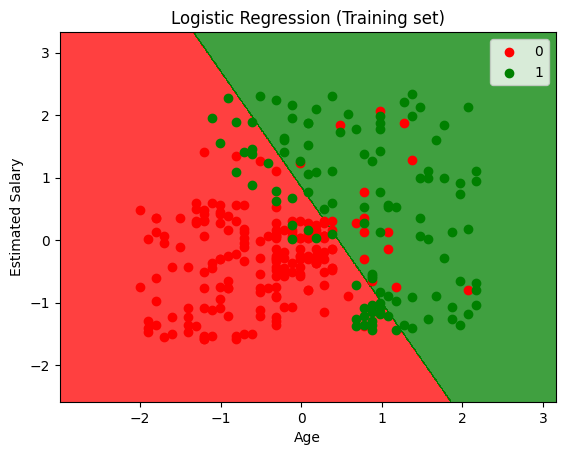

/tmp/ipython-input-2273405955.py:56: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


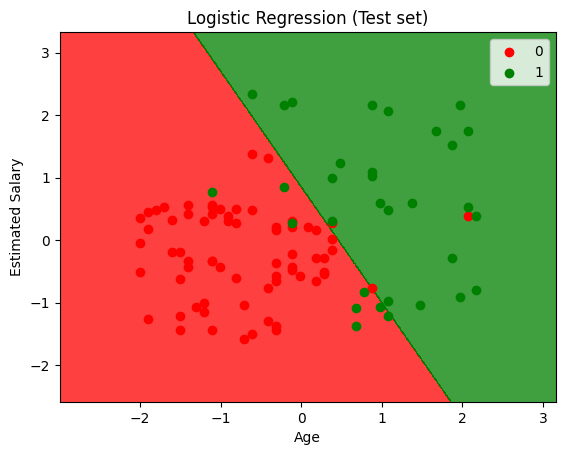

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first'), [1])],
    remainder='passthrough'
)
X = ct.fit_transform(X)
X = X.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy_score(y_test, y_pred))

def plot_decision_boundary(X_set, y_set, title):
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, -2].min() - 1, stop=X_set[:, -2].max() + 1, step=0.01),
        np.arange(start=X_set[:, -1].min() - 1, stop=X_set[:, -1].max() + 1, step=0.01)
    )

    grid = np.zeros((X1.ravel().shape[0], X_set.shape[1]))
    grid[:, -2:] = np.array([X1.ravel(), X2.ravel()]).T

    plt.contourf(
        X1, X2,
        classifier.predict(grid).reshape(X1.shape),
        alpha=0.75,
        cmap=ListedColormap(("red", "green"))
    )

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(
            X_set[y_set == j, -2],
            X_set[y_set == j, -1],
            c=ListedColormap(("red", "green"))(i),
            label=j
        )

    plt.title(title)
    plt.xlabel("Age")
    plt.ylabel("Estimated Salary")
    plt.legend()
    plt.show()

plot_decision_boundary(X_train, y_train, "Logistic Regression (Training set)")
plot_decision_boundary(X_test, y_test, "Logistic Regression (Test set)")
